In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
big_df = pd.read_csv("../datasets/results.csv")
# big_df = pd.read_csv("../datasets/final_data/FIFA 1990-2018 - Cleaned.csv")


big_df=big_df.replace({"South Korea":"Korea Republic"})
big_df = big_df.replace({"Iran":"IR Iran"})
big_df = big_df.replace({"Soviet Union":"Russia"})
big_df = big_df.replace({"Czechoslovakia":"Czech Republic"})

In [32]:
# big_df.columns = ['home_team', 'away_team', 'Rounds', 'Stadium', 'City', 'Time', 'Day', 'Month',
#        'Year', 'home_score', 'away_score', 'Remarks']


In [45]:
big_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


# Compute the Strongness of countries

In [46]:
countries = list(set(big_df["home_team"]).union(set(big_df["away_team"])))
countries_dict = {}
for i in range(len(countries)):
    countries_dict[countries[i]] = []

In [47]:
countries_dict

{'Afghanistan': [],
 'Albania': [],
 'Algeria': [],
 'American Samoa': [],
 'Andorra': [],
 'Angola': [],
 'Anguilla': [],
 'Antigua and Barbuda': [],
 'Argentina': [],
 'Armenia': [],
 'Aruba': [],
 'Australia': [],
 'Austria': [],
 'Azerbaijan': [],
 'Bahamas': [],
 'Bahrain': [],
 'Bangladesh': [],
 'Barbados': [],
 'Belarus': [],
 'Belgium': [],
 'Belize': [],
 'Benin': [],
 'Bermuda': [],
 'Bhutan': [],
 'Bolivia': [],
 'Bonaire': [],
 'Bosnia-Herzegovina': [],
 'Botswana': [],
 'Brazil': [],
 'British Virgin Islands': [],
 'Brunei': [],
 'Bulgaria': [],
 'Burkina Faso': [],
 'Burma': [],
 'Burundi': [],
 'Cambodia': [],
 'Cameroon': [],
 'Canada': [],
 'Cape Verde': [],
 'Cayman Islands': [],
 'Central African Republic': [],
 'Chad': [],
 'Chile': [],
 'China': [],
 'Colombia': [],
 'Comoros': [],
 'Congo': [],
 'Congo DR': [],
 'Cook Islands': [],
 'Costa Rica': [],
 'Croatia': [],
 'Cuba': [],
 'Curaçao': [],
 'Cyprus': [],
 'Czech Republic': [],
 'Denmark': [],
 'Djibouti': []

In [48]:
for i in range (len(big_df['home_team'])):
    total_goal = big_df['home_score'][i]+big_df['away_score'][i]
    if total_goal !=0:
        ratio_home_team = big_df['home_score'][i]/total_goal
        ratio_away_team = big_df['away_score'][i]/total_goal
        
        countries_dict[big_df['home_team'][i]].append(ratio_home_team)
        countries_dict[big_df['away_team'][i]].append(ratio_away_team)

    else:
        countries_dict[big_df['home_team'][i]].append(0)
        countries_dict[big_df['away_team'][i]].append(0)
    


In [49]:
x_axis =[]
y_axis =[]

for key in countries_dict.keys():
    print(key ,np.mean(countries_dict[key]))
    x_axis.append(key)
    y_axis.append(np.mean(countries_dict[key]))

Switzerland 0.443467253177
Kiribati 0.0919191919192
Turks and Caicos Islands 0.198148148148
Chad 0.330529595016
Tajikistan 0.490011160714
Senegal 0.501044028723
Mayotte 0.344973544974
Liechtenstein 0.149984737485
Ukraine 0.513731114936
Cambodia 0.314917113721
Palau 0.183823529412
St Vincent and the Grenadines 0.512110633727
Dominica 0.33098265081
Kosovo 0.398696145125
Korea Republic 0.585791260279
Andorra 0.0947841922157
Congo DR 0.481195745578
United Arab Emirates 0.470210504106
Oman 0.44349510139
Réunion 0.411053658202
Madagascar 0.413089164237
USA 0.485476431341
Ivory Coast 0.555692239859
Eritrea 0.243231292517
Saudi Arabia 0.526097025841
Israel 0.448384766528
Mauritius 0.364740476309
Greenland 0.187878787879
Poland 0.501784937987
Czech Republic 0.537099977786
Vanuatu 0.424740537241
Bolivia 0.320558032597
Micronesia FS 0.171428571429
Mauritania 0.262899974805
Hungary 0.533578841793
Thailand 0.470771889401
Italy 0.580630462887
Liberia 0.362523191095
Mongolia 0.269459001038
Botswana 0

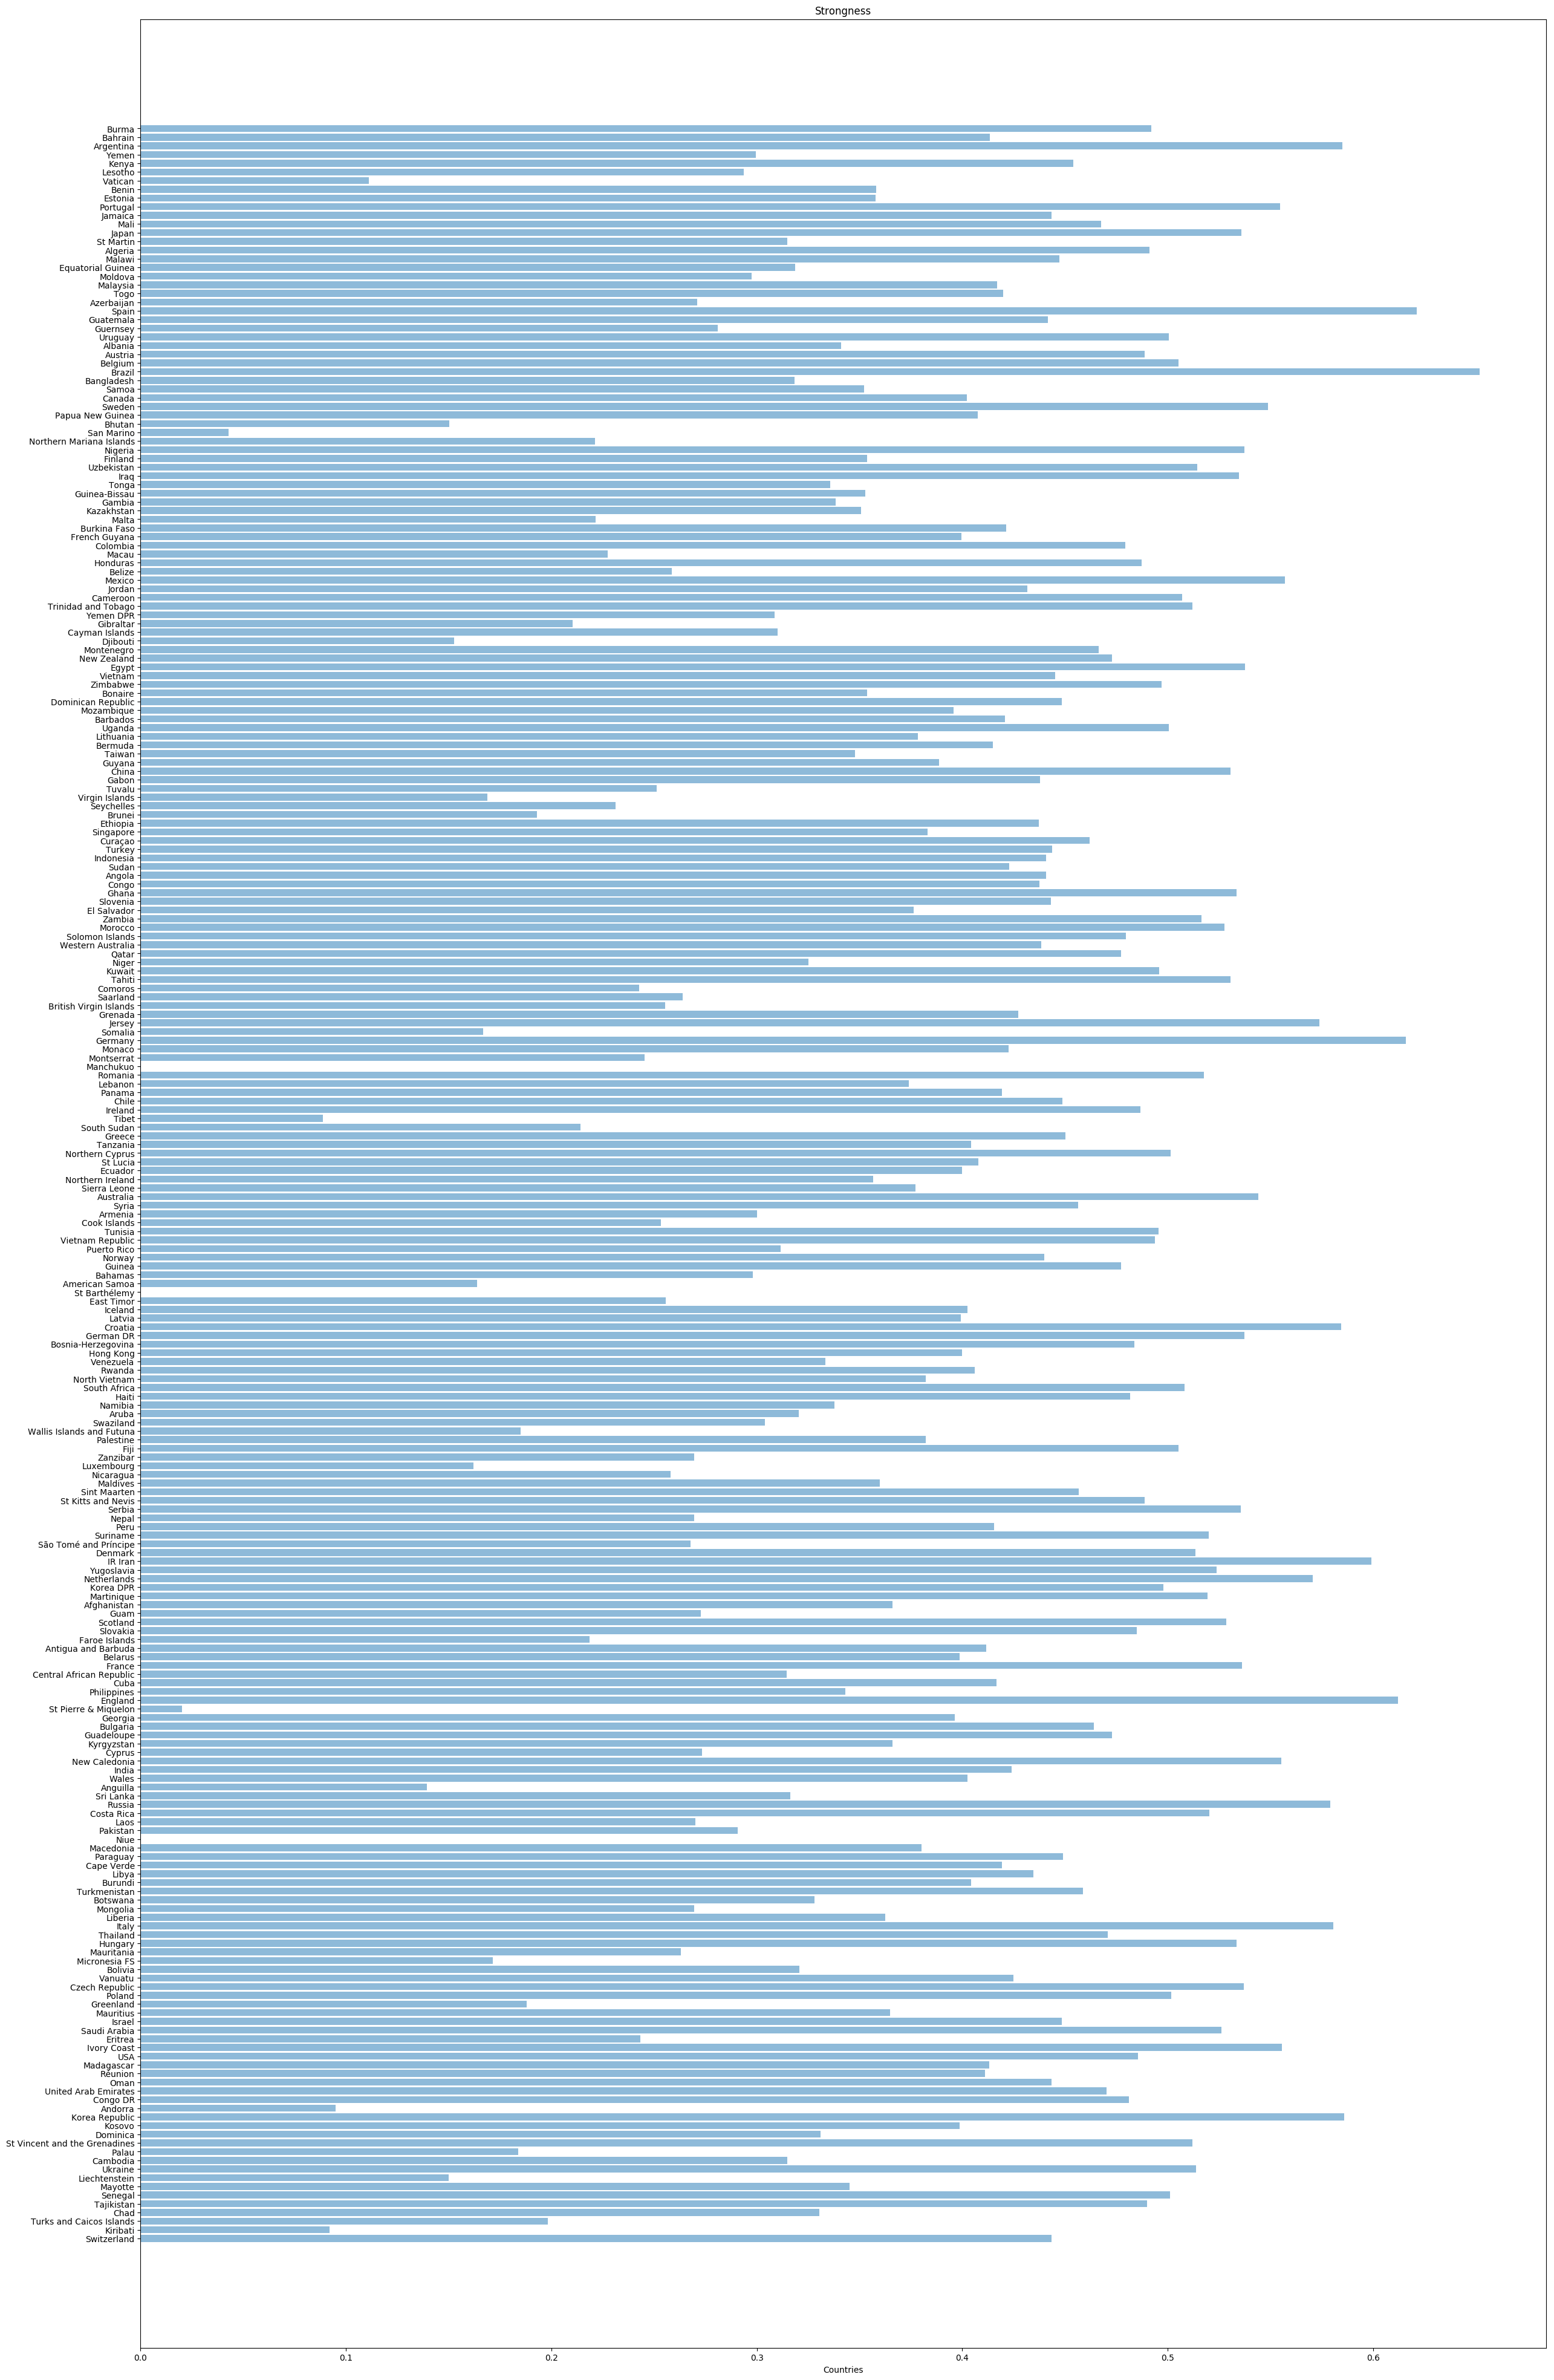

In [57]:
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
figure(num=None, figsize=(30,50), dpi=100, facecolor='w', edgecolor='k')
 
objects = x_axis
y_pos = np.arange(len(objects))
performance = y_axis
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Countries')
plt.title('Strongness')
 
plt.show()

# Strong / Week Countries by threshold

In [69]:
def threshold(t,x_axis,y_axis):
    strong=[]
    week =[]
    
    for index, x in enumerate(y_axis):
        if y_axis[index] > t:
            strong.append(x_axis[index])
        else:
            week.append(x_axis[index])
    return strong,week

In [78]:
stron_countries,week_countries = threshold(0.2,x_axis,y_axis)
week_countries

['Kiribati',
 'Turks and Caicos Islands',
 'Liechtenstein',
 'Palau',
 'Andorra',
 'Greenland',
 'Micronesia FS',
 'Niue',
 'Anguilla',
 'St Pierre & Miquelon',
 'Luxembourg',
 'Wallis Islands and Futuna',
 'St Barthélemy',
 'American Samoa',
 'Tibet',
 'Manchukuo',
 'Somalia',
 'Brunei',
 'Virgin Islands',
 'Djibouti',
 'San Marino',
 'Bhutan',
 'Vatican']

strog conuntries by threshhold = 0.6 are 
    -['England', 'Germany', 'Brazil', 'Spain']

In [101]:
strong_df = big_df[(big_df.home_team =='England')|(big_df.home_team =='Germany')|(big_df.home_team =='Brazil')|(big_df.home_team =='Spain')|(big_df.away_team =='England')|(big_df.away_team =='Germany')|(big_df.away_team =='Brazil')|(big_df.away_team =='Spain')]

In [102]:
strong_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland
